In [2]:
import tensorflow as tf

In [3]:
tf.__version__

'2.3.0'

In [4]:
RANDOM_SEED = 42

In [5]:
tf.random.set_seed(RANDOM_SEED)

In [6]:
x = tf.constant(1)

In [7]:
x

<tf.Tensor: shape=(), dtype=int32, numpy=1>

In [8]:
x.numpy()

1

In [9]:
m = tf.constant(
    [[1,2,3],
     [4,5,6]]
)

In [10]:
m

<tf.Tensor: shape=(2, 3), dtype=int32, numpy=
array([[1, 2, 3],
       [4, 5, 6]])>

In [11]:
type(m.numpy())

numpy.ndarray

# Helpers in tensorflow

In [12]:
tf.ones([3,3])

<tf.Tensor: shape=(3, 3), dtype=float32, numpy=
array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]], dtype=float32)>

In [13]:
tf.zeros([2,3])

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[0., 0., 0.],
       [0., 0., 0.]], dtype=float32)>

In [14]:
m = tf.reshape(m,[3,2])
m.numpy()

array([[1, 2],
       [3, 4],
       [5, 6]])

In [15]:
tf.transpose(m)

<tf.Tensor: shape=(2, 3), dtype=int32, numpy=
array([[1, 3, 5],
       [2, 4, 6]])>

# Tensor Math

In [16]:
a = tf.constant(5)
b = tf.constant(6)

In [17]:
res = a+b
res

<tf.Tensor: shape=(), dtype=int32, numpy=11>

In [18]:
res.numpy()

11

In [19]:
(res*res).numpy()

121

### Dot Multiplication

In [20]:
m = tf.constant(
    [[1,2,3],
     [4,5,6]]
)

In [21]:
m*m

<tf.Tensor: shape=(2, 3), dtype=int32, numpy=
array([[ 1,  4,  9],
       [16, 25, 36]])>

In [22]:
tf.tensordot(m, tf.transpose(m), 1)

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[14, 32],
       [32, 77]])>

In [23]:
m

<tf.Tensor: shape=(2, 3), dtype=int32, numpy=
array([[1, 2, 3],
       [4, 5, 6]])>

In [24]:
tf.transpose(m)

<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
array([[1, 4],
       [2, 5],
       [3, 6]])>

In [25]:
d1 = tf.constant([[1, 2], [1, 2]]);
d2 = tf.constant([[3, 4], [3, 4]]);

tf.tensordot(d1, d2, axes=1).numpy()

array([[ 9, 12],
       [ 9, 12]])

# Generating Random Numbers

### From normal distribution

In [26]:
# Shape should be in tuple or list
tf.random.normal(shape=(1,))

<tf.Tensor: shape=(1,), dtype=float32, numpy=array([0.3274685], dtype=float32)>

### From uniform Distribution

In [27]:
tf.random.uniform(shape=(1,))

<tf.Tensor: shape=(1,), dtype=float32, numpy=array([0.68789124], dtype=float32)>

### Form Poisson's Ratio

In [28]:
tf.random.poisson(shape=(1,), lam=1)

<tf.Tensor: shape=(1,), dtype=float32, numpy=array([0.], dtype=float32)>

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\Brothers\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


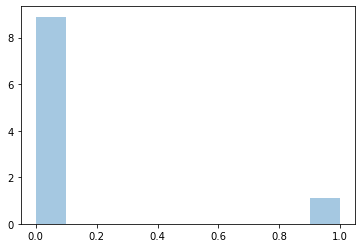

In [30]:
pois = tf.random.poisson(shape=(100,1),lam=0.1)
sns.distplot(pois)

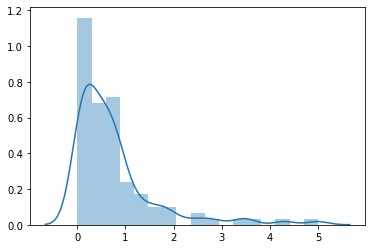

In [31]:
gma = tf.random.gamma(shape=(100,1), alpha=0.8)

sns.distplot(gma)

# Simple Linear regression

In [32]:
import pandas as pd

In [33]:
car = pd.read_csv('cars.csv').drop('Unnamed: 0',axis=1)

In [34]:
car.head()

,speed,dist
0,4,2
1,4,10
2,7,4
3,7,22
4,8,16


Text(0, 0.5, 'Speed')

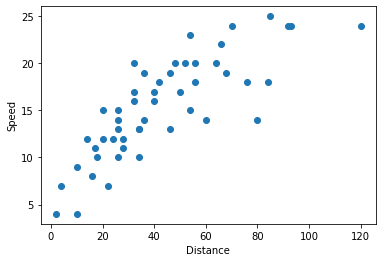

In [35]:
plt.scatter(car.dist, car.speed)
plt.xlabel('Distance')
plt.ylabel('Speed')

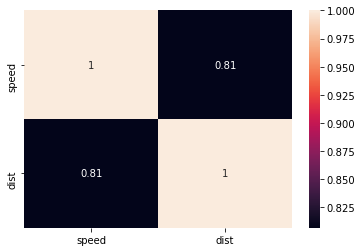

In [36]:
sns.heatmap(car.corr(), annot=True)

In [50]:
from tensorflow import keras as k
from tensorflow.keras.models import Sequential as sq

In [43]:
car.speed.shape

(50,)

In [44]:
model = Sequential([
    k.layers.Dense(1, activation='linear', input_shape=[1])
])

optimizer = k.optimizers.RMSprop(0.001)

In [45]:
model.compile(
    loss = 'mse',
    optimizer = optimizer,
    metrics = ['mse']
)

In [46]:
history = model.fit(
    x = car.speed,
    y = car.dist,
    shuffle=True,
    epochs = 1000,
    validation_split = 0.2
)

Epoch 1/1000
2/2 [==============================] - 0s 174ms/step - loss: 425.9714 - mse: 425.9714 - val_loss: 1890.3118 - val_mse: 1890.3118
Epoch 2/1000
2/2 [==============================] - 0s 18ms/step - loss: 423.7272 - mse: 423.7272 - val_loss: 1884.0123 - val_mse: 1884.0123
Epoch 3/1000
2/2 [==============================] - 0s 17ms/step - loss: 422.2481 - mse: 422.2481 - val_loss: 1878.2750 - val_mse: 1878.2750
Epoch 4/1000
2/2 [==============================] - 0s 16ms/step - loss: 420.9057 - mse: 420.9057 - val_loss: 1872.8958 - val_mse: 1872.8958
Epoch 5/1000
2/2 [==============================] - 0s 17ms/step - loss: 419.6455 - mse: 419.6455 - val_loss: 1867.7043 - val_mse: 1867.7043
Epoch 6/1000
2/2 [==============================] - 0s 17ms/step - loss: 418.4473 - mse: 418.4473 - val_loss: 1862.9475 - val_mse: 1862.9475
Epoch 7/1000
2/2 [==============================] - 0s 17ms/step - loss: 417.3906 - mse: 417.3906 - val_loss: 1859.2957 - val_mse: 1859.2957
Epoch 8/1000

Epoch 59/1000
2/2 [==============================] - 0s 17ms/step - loss: 376.1536 - mse: 376.1536 - val_loss: 1678.7086 - val_mse: 1678.7086
Epoch 60/1000
2/2 [==============================] - 0s 16ms/step - loss: 375.5110 - mse: 375.5110 - val_loss: 1675.5950 - val_mse: 1675.5950
Epoch 61/1000
2/2 [==============================] - 0s 17ms/step - loss: 374.8155 - mse: 374.8155 - val_loss: 1672.3219 - val_mse: 1672.3219
Epoch 62/1000
2/2 [==============================] - 0s 17ms/step - loss: 374.1026 - mse: 374.1026 - val_loss: 1669.2444 - val_mse: 1669.2444
Epoch 63/1000
2/2 [==============================] - 0s 17ms/step - loss: 373.4436 - mse: 373.4436 - val_loss: 1666.5215 - val_mse: 1666.5215
Epoch 64/1000
2/2 [==============================] - 0s 17ms/step - loss: 372.7989 - mse: 372.7989 - val_loss: 1662.9203 - val_mse: 1662.9203
Epoch 65/1000
2/2 [==============================] - 0s 17ms/step - loss: 372.0124 - mse: 372.0124 - val_loss: 1659.4766 - val_mse: 1659.4766
Epoch 

2/2 [==============================] - 0s 15ms/step - loss: 303.7770 - mse: 303.7770 - val_loss: 1330.2300 - val_mse: 1330.2300
Epoch 174/1000
2/2 [==============================] - 0s 11ms/step - loss: 303.1299 - mse: 303.1299 - val_loss: 1326.9988 - val_mse: 1326.9988
Epoch 175/1000
2/2 [==============================] - 0s 12ms/step - loss: 302.5389 - mse: 302.5389 - val_loss: 1324.4596 - val_mse: 1324.4596
Epoch 176/1000
2/2 [==============================] - 0s 15ms/step - loss: 302.0679 - mse: 302.0679 - val_loss: 1322.2002 - val_mse: 1322.2002
Epoch 177/1000
2/2 [==============================] - 0s 17ms/step - loss: 301.6082 - mse: 301.6082 - val_loss: 1319.2971 - val_mse: 1319.2971
Epoch 178/1000
2/2 [==============================] - 0s 17ms/step - loss: 301.0511 - mse: 301.0511 - val_loss: 1316.3191 - val_mse: 1316.3191
Epoch 179/1000
2/2 [==============================] - 0s 17ms/step - loss: 300.4466 - mse: 300.4466 - val_loss: 1312.1086 - val_mse: 1312.1086
Epoch 180/1000

2/2 [==============================] - 0s 17ms/step - loss: 253.8407 - mse: 253.8407 - val_loss: 1045.4180 - val_mse: 1045.4180
Epoch 288/1000
2/2 [==============================] - 0s 16ms/step - loss: 253.5252 - mse: 253.5252 - val_loss: 1042.6166 - val_mse: 1042.6166
Epoch 289/1000
2/2 [==============================] - 0s 16ms/step - loss: 253.1404 - mse: 253.1404 - val_loss: 1041.2927 - val_mse: 1041.2927
Epoch 290/1000
2/2 [==============================] - 0s 17ms/step - loss: 252.8961 - mse: 252.8961 - val_loss: 1038.6337 - val_mse: 1038.6337
Epoch 291/1000
2/2 [==============================] - 0s 16ms/step - loss: 252.4878 - mse: 252.4878 - val_loss: 1035.7522 - val_mse: 1035.7522
Epoch 292/1000
2/2 [==============================] - 0s 17ms/step - loss: 252.0890 - mse: 252.0890 - val_loss: 1034.3833 - val_mse: 1034.3833
Epoch 293/1000
2/2 [==============================] - 0s 17ms/step - loss: 251.8716 - mse: 251.8716 - val_loss: 1032.7017 - val_mse: 1032.7017
Epoch 294/1000

Epoch 345/1000
2/2 [==============================] - 0s 15ms/step - loss: 237.0517 - mse: 237.0517 - val_loss: 928.9688 - val_mse: 928.9688
Epoch 346/1000
2/2 [==============================] - 0s 16ms/step - loss: 236.9368 - mse: 236.9368 - val_loss: 927.3425 - val_mse: 927.3425
Epoch 347/1000
2/2 [==============================] - 0s 18ms/step - loss: 236.7122 - mse: 236.7122 - val_loss: 925.2684 - val_mse: 925.2684
Epoch 348/1000
2/2 [==============================] - 0s 17ms/step - loss: 236.4289 - mse: 236.4289 - val_loss: 922.6536 - val_mse: 922.6536
Epoch 349/1000
2/2 [==============================] - 0s 17ms/step - loss: 236.1469 - mse: 236.1469 - val_loss: 921.8358 - val_mse: 921.8358
Epoch 350/1000
2/2 [==============================] - 0s 16ms/step - loss: 236.0441 - mse: 236.0441 - val_loss: 921.0530 - val_mse: 921.0530
Epoch 351/1000
2/2 [==============================] - 0s 17ms/step - loss: 235.9188 - mse: 235.9188 - val_loss: 919.6901 - val_mse: 919.6901
Epoch 352/100

2/2 [==============================] - 0s 18ms/step - loss: 225.5590 - mse: 225.5590 - val_loss: 832.9497 - val_mse: 832.9497
Epoch 404/1000
2/2 [==============================] - 0s 18ms/step - loss: 225.4500 - mse: 225.4500 - val_loss: 830.2311 - val_mse: 830.2311
Epoch 405/1000
2/2 [==============================] - 0s 17ms/step - loss: 225.1640 - mse: 225.1640 - val_loss: 828.4277 - val_mse: 828.4277
Epoch 406/1000
2/2 [==============================] - 0s 16ms/step - loss: 224.9963 - mse: 224.9963 - val_loss: 827.6131 - val_mse: 827.6131
Epoch 407/1000
2/2 [==============================] - 0s 18ms/step - loss: 224.8873 - mse: 224.8873 - val_loss: 825.8480 - val_mse: 825.8480
Epoch 408/1000
2/2 [==============================] - 0s 18ms/step - loss: 224.7159 - mse: 224.7159 - val_loss: 824.6891 - val_mse: 824.6891
Epoch 409/1000
2/2 [==============================] - 0s 17ms/step - loss: 224.5753 - mse: 224.5753 - val_loss: 822.6185 - val_mse: 822.6185
Epoch 410/1000
2/2 [========

2/2 [==============================] - 0s 17ms/step - loss: 214.2048 - mse: 214.2048 - val_loss: 700.8520 - val_mse: 700.8520
Epoch 520/1000
2/2 [==============================] - 0s 17ms/step - loss: 214.1315 - mse: 214.1315 - val_loss: 698.5698 - val_mse: 698.5698
Epoch 521/1000
2/2 [==============================] - 0s 16ms/step - loss: 213.9784 - mse: 213.9784 - val_loss: 697.9441 - val_mse: 697.9441
Epoch 522/1000
2/2 [==============================] - 0s 16ms/step - loss: 213.9338 - mse: 213.9338 - val_loss: 696.3887 - val_mse: 696.3887
Epoch 523/1000
2/2 [==============================] - 0s 17ms/step - loss: 213.8405 - mse: 213.8405 - val_loss: 694.8561 - val_mse: 694.8561
Epoch 524/1000
2/2 [==============================] - 0s 17ms/step - loss: 213.7492 - mse: 213.7492 - val_loss: 693.4073 - val_mse: 693.4073
Epoch 525/1000
2/2 [==============================] - 0s 17ms/step - loss: 213.6828 - mse: 213.6828 - val_loss: 693.3163 - val_mse: 693.3163
Epoch 526/1000
2/2 [========

2/2 [==============================] - 0s 17ms/step - loss: 210.7447 - mse: 210.7447 - val_loss: 625.0091 - val_mse: 625.0091
Epoch 636/1000
2/2 [==============================] - 0s 22ms/step - loss: 210.7439 - mse: 210.7439 - val_loss: 624.8091 - val_mse: 624.8091
Epoch 637/1000
2/2 [==============================] - 0s 17ms/step - loss: 210.7825 - mse: 210.7825 - val_loss: 625.7794 - val_mse: 625.7794
Epoch 638/1000
2/2 [==============================] - 0s 17ms/step - loss: 210.7731 - mse: 210.7731 - val_loss: 626.2603 - val_mse: 626.2603
Epoch 639/1000
2/2 [==============================] - 0s 17ms/step - loss: 210.7832 - mse: 210.7832 - val_loss: 624.8990 - val_mse: 624.8990
Epoch 640/1000
2/2 [==============================] - 0s 17ms/step - loss: 210.7506 - mse: 210.7506 - val_loss: 625.3973 - val_mse: 625.3973
Epoch 641/1000
2/2 [==============================] - 0s 17ms/step - loss: 210.7507 - mse: 210.7507 - val_loss: 625.2783 - val_mse: 625.2783
Epoch 642/1000
2/2 [========

2/2 [==============================] - 0s 17ms/step - loss: 210.2969 - mse: 210.2969 - val_loss: 603.9879 - val_mse: 603.9879
Epoch 752/1000
2/2 [==============================] - 0s 17ms/step - loss: 210.2898 - mse: 210.2898 - val_loss: 604.2196 - val_mse: 604.2196
Epoch 753/1000
2/2 [==============================] - 0s 16ms/step - loss: 210.2900 - mse: 210.2900 - val_loss: 603.4232 - val_mse: 603.4232
Epoch 754/1000
2/2 [==============================] - 0s 15ms/step - loss: 210.2789 - mse: 210.2789 - val_loss: 603.3401 - val_mse: 603.3401
Epoch 755/1000
2/2 [==============================] - 0s 16ms/step - loss: 210.3156 - mse: 210.3156 - val_loss: 604.4236 - val_mse: 604.4236
Epoch 756/1000
2/2 [==============================] - 0s 16ms/step - loss: 210.2881 - mse: 210.2881 - val_loss: 604.0456 - val_mse: 604.0456
Epoch 757/1000
2/2 [==============================] - 0s 17ms/step - loss: 210.2914 - mse: 210.2914 - val_loss: 604.5967 - val_mse: 604.5967
Epoch 758/1000
2/2 [========

2/2 [==============================] - 0s 16ms/step - loss: 210.1090 - mse: 210.1090 - val_loss: 590.6743 - val_mse: 590.6743
Epoch 868/1000
2/2 [==============================] - 0s 16ms/step - loss: 210.1036 - mse: 210.1036 - val_loss: 590.0208 - val_mse: 590.0208
Epoch 869/1000
2/2 [==============================] - 0s 18ms/step - loss: 210.1036 - mse: 210.1036 - val_loss: 590.6953 - val_mse: 590.6953
Epoch 870/1000
2/2 [==============================] - 0s 16ms/step - loss: 210.0995 - mse: 210.0995 - val_loss: 590.8470 - val_mse: 590.8470
Epoch 871/1000
2/2 [==============================] - 0s 17ms/step - loss: 210.1293 - mse: 210.1293 - val_loss: 591.9797 - val_mse: 591.9797
Epoch 872/1000
2/2 [==============================] - 0s 16ms/step - loss: 210.1122 - mse: 210.1122 - val_loss: 592.6876 - val_mse: 592.6876
Epoch 873/1000
2/2 [==============================] - 0s 16ms/step - loss: 210.1152 - mse: 210.1152 - val_loss: 593.3924 - val_mse: 593.3924
Epoch 874/1000
2/2 [========

2/2 [==============================] - 0s 14ms/step - loss: 210.0358 - mse: 210.0358 - val_loss: 583.4655 - val_mse: 583.4655
Epoch 984/1000
2/2 [==============================] - 0s 15ms/step - loss: 210.0459 - mse: 210.0459 - val_loss: 584.5989 - val_mse: 584.5989
Epoch 985/1000
2/2 [==============================] - 0s 16ms/step - loss: 210.0126 - mse: 210.0126 - val_loss: 585.1198 - val_mse: 585.1198
Epoch 986/1000
2/2 [==============================] - 0s 15ms/step - loss: 210.0355 - mse: 210.0355 - val_loss: 586.1381 - val_mse: 586.1381
Epoch 987/1000
2/2 [==============================] - 0s 16ms/step - loss: 210.0087 - mse: 210.0087 - val_loss: 585.9149 - val_mse: 585.9149
Epoch 988/1000
2/2 [==============================] - 0s 17ms/step - loss: 210.0151 - mse: 210.0151 - val_loss: 585.2443 - val_mse: 585.2443
Epoch 989/1000
2/2 [==============================] - 0s 18ms/step - loss: 210.0074 - mse: 210.0074 - val_loss: 584.9401 - val_mse: 584.9401
Epoch 990/1000
2/2 [========

In [47]:
history.history.keys()
[loss, mse, val_loss, val_mse] = [
    history.history['loss'],
    history.history['mse'],
    history.history['val_loss'],
    history.history['val_mse'],
]

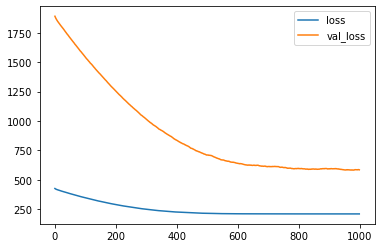

In [48]:
plt.plot(loss)
plt.plot(val_loss)

plt.legend(['loss', 'val_loss'])

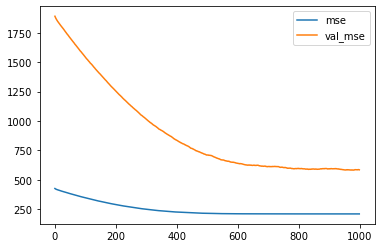

In [49]:
plt.plot(mse)
plt.plot(val_mse)

plt.legend(['mse', 'val_mse'])

# Simple Neural Net Model

In [51]:
model = sq([
    k.layers.Dense(32, activation='relu', input_shape=[1]),
    k.layers.Dense(16, activation='relu'),
    k.layers.Dense(1)
])

In [52]:
optimizer = tf.keras.optimizers.RMSprop(0.001)

In [54]:
model.compile(
    loss='mse',
    optimizer = optimizer,
    metrics=['mse', 'accuracy']
)

In [55]:
history = model.fit(
    x = car.speed,
    y = car.dist,
    shuffle=True,
    epochs = 1000,
    validation_split = 0.2
)

Epoch 1/1000
2/2 [==============================] - 0s 166ms/step - loss: 1765.7864 - mse: 1765.7864 - accuracy: 0.0000e+00 - val_loss: 6401.6719 - val_mse: 6401.6719 - val_accuracy: 0.0000e+00
Epoch 2/1000
2/2 [==============================] - 0s 10ms/step - loss: 1694.3170 - mse: 1694.3170 - accuracy: 0.0000e+00 - val_loss: 6253.7612 - val_mse: 6253.7612 - val_accuracy: 0.0000e+00
Epoch 3/1000
2/2 [==============================] - 0s 15ms/step - loss: 1648.0485 - mse: 1648.0485 - accuracy: 0.0000e+00 - val_loss: 6119.1855 - val_mse: 6119.1855 - val_accuracy: 0.0000e+00
Epoch 4/1000
2/2 [==============================] - 0s 18ms/step - loss: 1606.3932 - mse: 1606.3932 - accuracy: 0.0000e+00 - val_loss: 5995.7554 - val_mse: 5995.7554 - val_accuracy: 0.0000e+00
Epoch 5/1000
2/2 [==============================] - 0s 17ms/step - loss: 1568.5896 - mse: 1568.5896 - accuracy: 0.0000e+00 - val_loss: 5896.8452 - val_mse: 5896.8452 - val_accuracy: 0.0000e+00
Epoch 6/1000
2/2 [================

Epoch 86/1000
2/2 [==============================] - 0s 17ms/step - loss: 236.5208 - mse: 236.5208 - accuracy: 0.0000e+00 - val_loss: 924.8964 - val_mse: 924.8964 - val_accuracy: 0.0000e+00
Epoch 87/1000
2/2 [==============================] - 0s 19ms/step - loss: 234.7874 - mse: 234.7874 - accuracy: 0.0000e+00 - val_loss: 891.8879 - val_mse: 891.8879 - val_accuracy: 0.0000e+00
Epoch 88/1000
2/2 [==============================] - 0s 23ms/step - loss: 230.7338 - mse: 230.7338 - accuracy: 0.0000e+00 - val_loss: 848.3417 - val_mse: 848.3417 - val_accuracy: 0.0000e+00
Epoch 89/1000
2/2 [==============================] - 0s 18ms/step - loss: 226.2348 - mse: 226.2348 - accuracy: 0.0000e+00 - val_loss: 826.1735 - val_mse: 826.1735 - val_accuracy: 0.0000e+00
Epoch 90/1000
2/2 [==============================] - 0s 16ms/step - loss: 224.1241 - mse: 224.1241 - accuracy: 0.0000e+00 - val_loss: 809.8104 - val_mse: 809.8104 - val_accuracy: 0.0000e+00
Epoch 91/1000
2/2 [==============================]

Epoch 129/1000
2/2 [==============================] - 0s 16ms/step - loss: 211.1295 - mse: 211.1295 - accuracy: 0.0000e+00 - val_loss: 590.6286 - val_mse: 590.6286 - val_accuracy: 0.0000e+00
Epoch 130/1000
2/2 [==============================] - 0s 18ms/step - loss: 211.1913 - mse: 211.1913 - accuracy: 0.0000e+00 - val_loss: 579.2084 - val_mse: 579.2084 - val_accuracy: 0.0000e+00
Epoch 131/1000
2/2 [==============================] - 0s 20ms/step - loss: 211.6948 - mse: 211.6948 - accuracy: 0.0000e+00 - val_loss: 608.3681 - val_mse: 608.3681 - val_accuracy: 0.0000e+00
Epoch 132/1000
2/2 [==============================] - 0s 23ms/step - loss: 211.8613 - mse: 211.8613 - accuracy: 0.0000e+00 - val_loss: 580.2064 - val_mse: 580.2064 - val_accuracy: 0.0000e+00
Epoch 133/1000
2/2 [==============================] - 0s 22ms/step - loss: 211.1627 - mse: 211.1627 - accuracy: 0.0000e+00 - val_loss: 589.1101 - val_mse: 589.1101 - val_accuracy: 0.0000e+00
Epoch 134/1000
2/2 [=========================

Epoch 172/1000
2/2 [==============================] - 0s 21ms/step - loss: 211.1164 - mse: 211.1164 - accuracy: 0.0000e+00 - val_loss: 619.5072 - val_mse: 619.5072 - val_accuracy: 0.0000e+00
Epoch 173/1000
2/2 [==============================] - 0s 18ms/step - loss: 211.0715 - mse: 211.0715 - accuracy: 0.0000e+00 - val_loss: 598.7128 - val_mse: 598.7128 - val_accuracy: 0.0000e+00
Epoch 174/1000
2/2 [==============================] - 0s 18ms/step - loss: 210.9195 - mse: 210.9195 - accuracy: 0.0000e+00 - val_loss: 580.3048 - val_mse: 580.3048 - val_accuracy: 0.0000e+00
Epoch 175/1000
2/2 [==============================] - 0s 18ms/step - loss: 210.8670 - mse: 210.8670 - accuracy: 0.0000e+00 - val_loss: 596.1654 - val_mse: 596.1654 - val_accuracy: 0.0000e+00
Epoch 176/1000
2/2 [==============================] - 0s 19ms/step - loss: 211.3206 - mse: 211.3206 - accuracy: 0.0000e+00 - val_loss: 621.2595 - val_mse: 621.2595 - val_accuracy: 0.0000e+00
Epoch 177/1000
2/2 [=========================

Epoch 215/1000
2/2 [==============================] - 0s 17ms/step - loss: 210.9559 - mse: 210.9559 - accuracy: 0.0000e+00 - val_loss: 585.2712 - val_mse: 585.2712 - val_accuracy: 0.0000e+00
Epoch 216/1000
2/2 [==============================] - 0s 19ms/step - loss: 210.6134 - mse: 210.6134 - accuracy: 0.0000e+00 - val_loss: 570.4547 - val_mse: 570.4547 - val_accuracy: 0.0000e+00
Epoch 217/1000
2/2 [==============================] - 0s 18ms/step - loss: 210.5869 - mse: 210.5869 - accuracy: 0.0000e+00 - val_loss: 585.0038 - val_mse: 585.0038 - val_accuracy: 0.0000e+00
Epoch 218/1000
2/2 [==============================] - 0s 17ms/step - loss: 211.1408 - mse: 211.1408 - accuracy: 0.0000e+00 - val_loss: 561.2931 - val_mse: 561.2931 - val_accuracy: 0.0000e+00
Epoch 219/1000
2/2 [==============================] - 0s 17ms/step - loss: 210.8378 - mse: 210.8378 - accuracy: 0.0000e+00 - val_loss: 581.1337 - val_mse: 581.1337 - val_accuracy: 0.0000e+00
Epoch 220/1000
2/2 [=========================

Epoch 258/1000
2/2 [==============================] - 0s 17ms/step - loss: 210.9065 - mse: 210.9065 - accuracy: 0.0000e+00 - val_loss: 548.4027 - val_mse: 548.4027 - val_accuracy: 0.0000e+00
Epoch 259/1000
2/2 [==============================] - 0s 17ms/step - loss: 210.6599 - mse: 210.6599 - accuracy: 0.0000e+00 - val_loss: 568.5810 - val_mse: 568.5810 - val_accuracy: 0.0000e+00
Epoch 260/1000
2/2 [==============================] - 0s 18ms/step - loss: 210.3851 - mse: 210.3851 - accuracy: 0.0000e+00 - val_loss: 588.0313 - val_mse: 588.0313 - val_accuracy: 0.0000e+00
Epoch 261/1000
2/2 [==============================] - 0s 17ms/step - loss: 210.1031 - mse: 210.1031 - accuracy: 0.0000e+00 - val_loss: 584.1471 - val_mse: 584.1471 - val_accuracy: 0.0000e+00
Epoch 262/1000
2/2 [==============================] - 0s 17ms/step - loss: 210.1523 - mse: 210.1523 - accuracy: 0.0000e+00 - val_loss: 573.6327 - val_mse: 573.6327 - val_accuracy: 0.0000e+00
Epoch 263/1000
2/2 [=========================

Epoch 301/1000
2/2 [==============================] - 0s 17ms/step - loss: 210.1792 - mse: 210.1792 - accuracy: 0.0000e+00 - val_loss: 613.8874 - val_mse: 613.8874 - val_accuracy: 0.0000e+00
Epoch 302/1000
2/2 [==============================] - 0s 17ms/step - loss: 210.3691 - mse: 210.3691 - accuracy: 0.0000e+00 - val_loss: 586.8348 - val_mse: 586.8348 - val_accuracy: 0.0000e+00
Epoch 303/1000
2/2 [==============================] - 0s 17ms/step - loss: 209.8391 - mse: 209.8391 - accuracy: 0.0000e+00 - val_loss: 591.6487 - val_mse: 591.6487 - val_accuracy: 0.0000e+00
Epoch 304/1000
2/2 [==============================] - 0s 15ms/step - loss: 210.0222 - mse: 210.0222 - accuracy: 0.0000e+00 - val_loss: 570.5916 - val_mse: 570.5916 - val_accuracy: 0.0000e+00
Epoch 305/1000
2/2 [==============================] - 0s 16ms/step - loss: 210.1693 - mse: 210.1693 - accuracy: 0.0000e+00 - val_loss: 594.4627 - val_mse: 594.4627 - val_accuracy: 0.0000e+00
Epoch 306/1000
2/2 [=========================

Epoch 344/1000
2/2 [==============================] - 0s 17ms/step - loss: 210.0621 - mse: 210.0621 - accuracy: 0.0000e+00 - val_loss: 605.8600 - val_mse: 605.8600 - val_accuracy: 0.0000e+00
Epoch 345/1000
2/2 [==============================] - 0s 17ms/step - loss: 210.9348 - mse: 210.9348 - accuracy: 0.0000e+00 - val_loss: 629.6793 - val_mse: 629.6793 - val_accuracy: 0.0000e+00
Epoch 346/1000
2/2 [==============================] - 0s 17ms/step - loss: 210.4957 - mse: 210.4957 - accuracy: 0.0000e+00 - val_loss: 629.2263 - val_mse: 629.2263 - val_accuracy: 0.0000e+00
Epoch 347/1000
2/2 [==============================] - 0s 18ms/step - loss: 210.3976 - mse: 210.3976 - accuracy: 0.0000e+00 - val_loss: 620.9521 - val_mse: 620.9521 - val_accuracy: 0.0000e+00
Epoch 348/1000
2/2 [==============================] - 0s 18ms/step - loss: 210.1845 - mse: 210.1845 - accuracy: 0.0000e+00 - val_loss: 600.5124 - val_mse: 600.5124 - val_accuracy: 0.0000e+00
Epoch 349/1000
2/2 [=========================

Epoch 387/1000
2/2 [==============================] - 0s 17ms/step - loss: 209.5221 - mse: 209.5221 - accuracy: 0.0000e+00 - val_loss: 589.1197 - val_mse: 589.1197 - val_accuracy: 0.0000e+00
Epoch 388/1000
2/2 [==============================] - 0s 17ms/step - loss: 209.3727 - mse: 209.3727 - accuracy: 0.0000e+00 - val_loss: 583.5308 - val_mse: 583.5308 - val_accuracy: 0.0000e+00
Epoch 389/1000
2/2 [==============================] - 0s 16ms/step - loss: 209.3820 - mse: 209.3820 - accuracy: 0.0000e+00 - val_loss: 591.4467 - val_mse: 591.4467 - val_accuracy: 0.0000e+00
Epoch 390/1000
2/2 [==============================] - 0s 17ms/step - loss: 209.6492 - mse: 209.6492 - accuracy: 0.0000e+00 - val_loss: 566.2644 - val_mse: 566.2644 - val_accuracy: 0.0000e+00
Epoch 391/1000
2/2 [==============================] - 0s 17ms/step - loss: 209.3371 - mse: 209.3371 - accuracy: 0.0000e+00 - val_loss: 559.4313 - val_mse: 559.4313 - val_accuracy: 0.0000e+00
Epoch 392/1000
2/2 [=========================

Epoch 430/1000
2/2 [==============================] - 0s 17ms/step - loss: 209.2394 - mse: 209.2394 - accuracy: 0.0000e+00 - val_loss: 584.7305 - val_mse: 584.7305 - val_accuracy: 0.0000e+00
Epoch 431/1000
2/2 [==============================] - 0s 18ms/step - loss: 209.3235 - mse: 209.3235 - accuracy: 0.0000e+00 - val_loss: 564.1350 - val_mse: 564.1350 - val_accuracy: 0.0000e+00
Epoch 432/1000
2/2 [==============================] - 0s 16ms/step - loss: 209.1056 - mse: 209.1056 - accuracy: 0.0000e+00 - val_loss: 577.2505 - val_mse: 577.2505 - val_accuracy: 0.0000e+00
Epoch 433/1000
2/2 [==============================] - 0s 17ms/step - loss: 209.1562 - mse: 209.1562 - accuracy: 0.0000e+00 - val_loss: 561.0015 - val_mse: 561.0015 - val_accuracy: 0.0000e+00
Epoch 434/1000
2/2 [==============================] - 0s 17ms/step - loss: 209.7260 - mse: 209.7260 - accuracy: 0.0000e+00 - val_loss: 587.0887 - val_mse: 587.0887 - val_accuracy: 0.0000e+00
Epoch 435/1000
2/2 [=========================

Epoch 473/1000
2/2 [==============================] - 0s 17ms/step - loss: 209.3920 - mse: 209.3920 - accuracy: 0.0000e+00 - val_loss: 575.5958 - val_mse: 575.5958 - val_accuracy: 0.0000e+00
Epoch 474/1000
2/2 [==============================] - 0s 17ms/step - loss: 209.0153 - mse: 209.0153 - accuracy: 0.0000e+00 - val_loss: 592.2626 - val_mse: 592.2626 - val_accuracy: 0.0000e+00
Epoch 475/1000
2/2 [==============================] - 0s 17ms/step - loss: 208.9132 - mse: 208.9132 - accuracy: 0.0000e+00 - val_loss: 584.9056 - val_mse: 584.9056 - val_accuracy: 0.0000e+00
Epoch 476/1000
2/2 [==============================] - 0s 16ms/step - loss: 208.8203 - mse: 208.8203 - accuracy: 0.0000e+00 - val_loss: 585.0549 - val_mse: 585.0549 - val_accuracy: 0.0000e+00
Epoch 477/1000
2/2 [==============================] - 0s 17ms/step - loss: 208.7960 - mse: 208.7960 - accuracy: 0.0000e+00 - val_loss: 580.3260 - val_mse: 580.3260 - val_accuracy: 0.0000e+00
Epoch 478/1000
2/2 [=========================

Epoch 516/1000
2/2 [==============================] - 0s 18ms/step - loss: 209.5984 - mse: 209.5984 - accuracy: 0.0000e+00 - val_loss: 600.3251 - val_mse: 600.3251 - val_accuracy: 0.0000e+00
Epoch 517/1000
2/2 [==============================] - 0s 17ms/step - loss: 209.2070 - mse: 209.2070 - accuracy: 0.0000e+00 - val_loss: 611.9482 - val_mse: 611.9482 - val_accuracy: 0.0000e+00
Epoch 518/1000
2/2 [==============================] - 0s 17ms/step - loss: 209.2346 - mse: 209.2346 - accuracy: 0.0000e+00 - val_loss: 603.3755 - val_mse: 603.3755 - val_accuracy: 0.0000e+00
Epoch 519/1000
2/2 [==============================] - 0s 20ms/step - loss: 208.9574 - mse: 208.9574 - accuracy: 0.0000e+00 - val_loss: 587.4570 - val_mse: 587.4570 - val_accuracy: 0.0000e+00
Epoch 520/1000
2/2 [==============================] - 0s 17ms/step - loss: 209.6189 - mse: 209.6189 - accuracy: 0.0000e+00 - val_loss: 556.6812 - val_mse: 556.6812 - val_accuracy: 0.0000e+00
Epoch 521/1000
2/2 [=========================

Epoch 559/1000
2/2 [==============================] - 0s 18ms/step - loss: 208.2027 - mse: 208.2027 - accuracy: 0.0000e+00 - val_loss: 549.7194 - val_mse: 549.7194 - val_accuracy: 0.0000e+00
Epoch 560/1000
2/2 [==============================] - 0s 17ms/step - loss: 208.3158 - mse: 208.3158 - accuracy: 0.0000e+00 - val_loss: 538.9213 - val_mse: 538.9213 - val_accuracy: 0.0000e+00
Epoch 561/1000
2/2 [==============================] - 0s 18ms/step - loss: 208.3719 - mse: 208.3719 - accuracy: 0.0000e+00 - val_loss: 533.3859 - val_mse: 533.3859 - val_accuracy: 0.0000e+00
Epoch 562/1000
2/2 [==============================] - 0s 12ms/step - loss: 208.6337 - mse: 208.6337 - accuracy: 0.0000e+00 - val_loss: 556.0375 - val_mse: 556.0375 - val_accuracy: 0.0000e+00
Epoch 563/1000
2/2 [==============================] - 0s 18ms/step - loss: 208.1256 - mse: 208.1256 - accuracy: 0.0000e+00 - val_loss: 557.3093 - val_mse: 557.3093 - val_accuracy: 0.0000e+00
Epoch 564/1000
2/2 [=========================

Epoch 602/1000
2/2 [==============================] - 0s 18ms/step - loss: 208.2138 - mse: 208.2138 - accuracy: 0.0000e+00 - val_loss: 529.5153 - val_mse: 529.5153 - val_accuracy: 0.0000e+00
Epoch 603/1000
2/2 [==============================] - 0s 19ms/step - loss: 208.1384 - mse: 208.1384 - accuracy: 0.0000e+00 - val_loss: 539.4634 - val_mse: 539.4634 - val_accuracy: 0.0000e+00
Epoch 604/1000
2/2 [==============================] - 0s 17ms/step - loss: 207.9919 - mse: 207.9919 - accuracy: 0.0000e+00 - val_loss: 550.9460 - val_mse: 550.9460 - val_accuracy: 0.0000e+00
Epoch 605/1000
2/2 [==============================] - 0s 18ms/step - loss: 207.8972 - mse: 207.8972 - accuracy: 0.0000e+00 - val_loss: 545.9435 - val_mse: 545.9435 - val_accuracy: 0.0000e+00
Epoch 606/1000
2/2 [==============================] - 0s 17ms/step - loss: 207.9130 - mse: 207.9130 - accuracy: 0.0000e+00 - val_loss: 556.5490 - val_mse: 556.5490 - val_accuracy: 0.0000e+00
Epoch 607/1000
2/2 [=========================

Epoch 645/1000
2/2 [==============================] - 0s 17ms/step - loss: 208.1762 - mse: 208.1762 - accuracy: 0.0000e+00 - val_loss: 588.8510 - val_mse: 588.8510 - val_accuracy: 0.0000e+00
Epoch 646/1000
2/2 [==============================] - 0s 16ms/step - loss: 208.5909 - mse: 208.5909 - accuracy: 0.0000e+00 - val_loss: 559.3873 - val_mse: 559.3873 - val_accuracy: 0.0000e+00
Epoch 647/1000
2/2 [==============================] - 0s 17ms/step - loss: 207.6147 - mse: 207.6147 - accuracy: 0.0000e+00 - val_loss: 556.8654 - val_mse: 556.8654 - val_accuracy: 0.0000e+00
Epoch 648/1000
2/2 [==============================] - 0s 15ms/step - loss: 207.9704 - mse: 207.9704 - accuracy: 0.0000e+00 - val_loss: 536.5040 - val_mse: 536.5040 - val_accuracy: 0.0000e+00
Epoch 649/1000
2/2 [==============================] - 0s 17ms/step - loss: 207.6791 - mse: 207.6791 - accuracy: 0.0000e+00 - val_loss: 543.2255 - val_mse: 543.2255 - val_accuracy: 0.0000e+00
Epoch 650/1000
2/2 [=========================

Epoch 688/1000
2/2 [==============================] - 0s 17ms/step - loss: 207.9652 - mse: 207.9652 - accuracy: 0.0000e+00 - val_loss: 582.7585 - val_mse: 582.7585 - val_accuracy: 0.0000e+00
Epoch 689/1000
2/2 [==============================] - 0s 17ms/step - loss: 207.8193 - mse: 207.8193 - accuracy: 0.0000e+00 - val_loss: 578.4883 - val_mse: 578.4883 - val_accuracy: 0.0000e+00
Epoch 690/1000
2/2 [==============================] - 0s 17ms/step - loss: 207.7909 - mse: 207.7909 - accuracy: 0.0000e+00 - val_loss: 581.8692 - val_mse: 581.8692 - val_accuracy: 0.0000e+00
Epoch 691/1000
2/2 [==============================] - 0s 17ms/step - loss: 207.7876 - mse: 207.7876 - accuracy: 0.0000e+00 - val_loss: 564.3861 - val_mse: 564.3861 - val_accuracy: 0.0000e+00
Epoch 692/1000
2/2 [==============================] - 0s 17ms/step - loss: 207.7054 - mse: 207.7054 - accuracy: 0.0000e+00 - val_loss: 578.7531 - val_mse: 578.7531 - val_accuracy: 0.0000e+00
Epoch 693/1000
2/2 [=========================

Epoch 731/1000
2/2 [==============================] - 0s 16ms/step - loss: 208.0507 - mse: 208.0507 - accuracy: 0.0000e+00 - val_loss: 550.1513 - val_mse: 550.1513 - val_accuracy: 0.0000e+00
Epoch 732/1000
2/2 [==============================] - 0s 18ms/step - loss: 207.1908 - mse: 207.1908 - accuracy: 0.0000e+00 - val_loss: 548.4896 - val_mse: 548.4896 - val_accuracy: 0.0000e+00
Epoch 733/1000
2/2 [==============================] - 0s 17ms/step - loss: 207.3712 - mse: 207.3712 - accuracy: 0.0000e+00 - val_loss: 565.2144 - val_mse: 565.2144 - val_accuracy: 0.0000e+00
Epoch 734/1000
2/2 [==============================] - 0s 18ms/step - loss: 207.3393 - mse: 207.3393 - accuracy: 0.0000e+00 - val_loss: 566.6077 - val_mse: 566.6077 - val_accuracy: 0.0000e+00
Epoch 735/1000
2/2 [==============================] - 0s 18ms/step - loss: 207.3182 - mse: 207.3182 - accuracy: 0.0000e+00 - val_loss: 561.0570 - val_mse: 561.0570 - val_accuracy: 0.0000e+00
Epoch 736/1000
2/2 [=========================

Epoch 816/1000
2/2 [==============================] - 0s 17ms/step - loss: 206.9476 - mse: 206.9476 - accuracy: 0.0000e+00 - val_loss: 526.6166 - val_mse: 526.6166 - val_accuracy: 0.0000e+00
Epoch 817/1000
2/2 [==============================] - 0s 16ms/step - loss: 206.8395 - mse: 206.8395 - accuracy: 0.0000e+00 - val_loss: 534.9175 - val_mse: 534.9175 - val_accuracy: 0.0000e+00
Epoch 818/1000
2/2 [==============================] - 0s 17ms/step - loss: 206.7797 - mse: 206.7797 - accuracy: 0.0000e+00 - val_loss: 542.1398 - val_mse: 542.1398 - val_accuracy: 0.0000e+00
Epoch 819/1000
2/2 [==============================] - 0s 17ms/step - loss: 206.7484 - mse: 206.7484 - accuracy: 0.0000e+00 - val_loss: 540.0594 - val_mse: 540.0594 - val_accuracy: 0.0000e+00
Epoch 820/1000
2/2 [==============================] - 0s 17ms/step - loss: 206.7694 - mse: 206.7694 - accuracy: 0.0000e+00 - val_loss: 533.0143 - val_mse: 533.0143 - val_accuracy: 0.0000e+00
Epoch 821/1000
2/2 [=========================

Epoch 859/1000
2/2 [==============================] - 0s 16ms/step - loss: 206.6637 - mse: 206.6637 - accuracy: 0.0000e+00 - val_loss: 551.5187 - val_mse: 551.5187 - val_accuracy: 0.0000e+00
Epoch 860/1000
2/2 [==============================] - 0s 18ms/step - loss: 206.7664 - mse: 206.7664 - accuracy: 0.0000e+00 - val_loss: 533.9557 - val_mse: 533.9557 - val_accuracy: 0.0000e+00
Epoch 861/1000
2/2 [==============================] - 0s 17ms/step - loss: 207.3028 - mse: 207.3028 - accuracy: 0.0000e+00 - val_loss: 511.1195 - val_mse: 511.1195 - val_accuracy: 0.0000e+00
Epoch 862/1000
2/2 [==============================] - 0s 17ms/step - loss: 206.8285 - mse: 206.8285 - accuracy: 0.0000e+00 - val_loss: 519.1507 - val_mse: 519.1507 - val_accuracy: 0.0000e+00
Epoch 863/1000
2/2 [==============================] - 0s 17ms/step - loss: 206.7780 - mse: 206.7780 - accuracy: 0.0000e+00 - val_loss: 535.3878 - val_mse: 535.3878 - val_accuracy: 0.0000e+00
Epoch 864/1000
2/2 [=========================

Epoch 902/1000
2/2 [==============================] - 0s 17ms/step - loss: 206.5359 - mse: 206.5359 - accuracy: 0.0000e+00 - val_loss: 543.9554 - val_mse: 543.9554 - val_accuracy: 0.0000e+00
Epoch 903/1000
2/2 [==============================] - 0s 18ms/step - loss: 206.6283 - mse: 206.6283 - accuracy: 0.0000e+00 - val_loss: 526.1282 - val_mse: 526.1282 - val_accuracy: 0.0000e+00
Epoch 904/1000
2/2 [==============================] - 0s 17ms/step - loss: 206.5736 - mse: 206.5736 - accuracy: 0.0000e+00 - val_loss: 542.2872 - val_mse: 542.2872 - val_accuracy: 0.0000e+00
Epoch 905/1000
2/2 [==============================] - 0s 18ms/step - loss: 206.4365 - mse: 206.4365 - accuracy: 0.0000e+00 - val_loss: 531.5756 - val_mse: 531.5756 - val_accuracy: 0.0000e+00
Epoch 906/1000
2/2 [==============================] - 0s 17ms/step - loss: 207.3919 - mse: 207.3919 - accuracy: 0.0000e+00 - val_loss: 556.9471 - val_mse: 556.9471 - val_accuracy: 0.0000e+00
Epoch 907/1000
2/2 [=========================

Epoch 945/1000
2/2 [==============================] - 0s 17ms/step - loss: 207.6906 - mse: 207.6906 - accuracy: 0.0000e+00 - val_loss: 487.8802 - val_mse: 487.8802 - val_accuracy: 0.0000e+00
Epoch 946/1000
2/2 [==============================] - 0s 17ms/step - loss: 207.0963 - mse: 207.0963 - accuracy: 0.0000e+00 - val_loss: 488.6100 - val_mse: 488.6100 - val_accuracy: 0.0000e+00
Epoch 947/1000
2/2 [==============================] - 0s 17ms/step - loss: 207.0686 - mse: 207.0686 - accuracy: 0.0000e+00 - val_loss: 489.4478 - val_mse: 489.4478 - val_accuracy: 0.0000e+00
Epoch 948/1000
2/2 [==============================] - 0s 17ms/step - loss: 207.0390 - mse: 207.0390 - accuracy: 0.0000e+00 - val_loss: 490.1275 - val_mse: 490.1275 - val_accuracy: 0.0000e+00
Epoch 949/1000
2/2 [==============================] - 0s 18ms/step - loss: 207.5645 - mse: 207.5645 - accuracy: 0.0000e+00 - val_loss: 477.2379 - val_mse: 477.2379 - val_accuracy: 0.0000e+00
Epoch 950/1000
2/2 [=========================

Epoch 988/1000
2/2 [==============================] - 0s 17ms/step - loss: 206.8175 - mse: 206.8175 - accuracy: 0.0000e+00 - val_loss: 554.0695 - val_mse: 554.0695 - val_accuracy: 0.0000e+00
Epoch 989/1000
2/2 [==============================] - 0s 17ms/step - loss: 206.2762 - mse: 206.2762 - accuracy: 0.0000e+00 - val_loss: 544.4990 - val_mse: 544.4990 - val_accuracy: 0.0000e+00
Epoch 990/1000
2/2 [==============================] - 0s 16ms/step - loss: 206.1464 - mse: 206.1464 - accuracy: 0.0000e+00 - val_loss: 545.9142 - val_mse: 545.9142 - val_accuracy: 0.0000e+00
Epoch 991/1000
2/2 [==============================] - 0s 17ms/step - loss: 206.1518 - mse: 206.1518 - accuracy: 0.0000e+00 - val_loss: 536.0735 - val_mse: 536.0735 - val_accuracy: 0.0000e+00
Epoch 992/1000
2/2 [==============================] - 0s 17ms/step - loss: 206.0456 - mse: 206.0456 - accuracy: 0.0000e+00 - val_loss: 532.6623 - val_mse: 532.6623 - val_accuracy: 0.0000e+00
Epoch 993/1000
2/2 [=========================

In [56]:
history.history.keys()
[loss, mse, val_loss, val_mse] = [
    history.history['loss'],
    history.history['mse'],
    history.history['val_loss'],
    history.history['val_mse'],
]

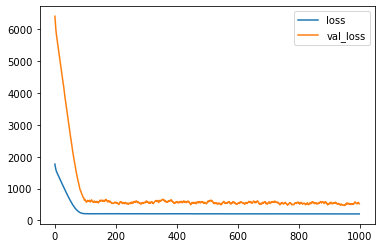

In [57]:
plt.plot(loss)
plt.plot(val_loss)

plt.legend(['loss', 'val_loss'])

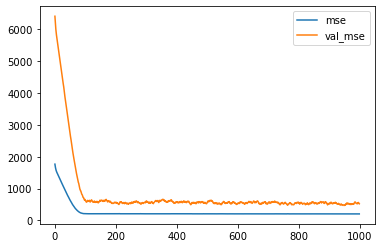

In [58]:
plt.plot(mse)
plt.plot(val_mse)

plt.legend(['mse', 'val_mse'])

# Early Stopping

In [77]:
model = sq([
    k.layers.Dense(32, activation='relu', input_shape=[1]),
    k.layers.Dense(16, activation='relu'),
    k.layers.Dense(1)
])

In [78]:
optimizer = tf.keras.optimizers.RMSprop(0.001)

In [79]:
model.compile(
    loss='mse',
    optimizer = optimizer,
    metrics=['mse', 'accuracy']
)

In [80]:
early_stop = k.callbacks.EarlyStopping(
    monitor = 'val_loss', # Quantity to be monitored.
    patience=10 # Number of epochs with no improvement after which training will be stopped.
)

In [81]:
history = model.fit(
    x = car.speed,
    y = car.dist,
    shuffle=True,
    epochs = 1000,
    validation_split = 0.2,
    callbacks = [early_stop]
)

Epoch 1/1000
2/2 [==============================] - 0s 151ms/step - loss: 1572.5039 - mse: 1572.5039 - accuracy: 0.0000e+00 - val_loss: 5727.8564 - val_mse: 5727.8564 - val_accuracy: 0.0000e+00
Epoch 2/1000
2/2 [==============================] - 0s 14ms/step - loss: 1486.2660 - mse: 1486.2660 - accuracy: 0.0000e+00 - val_loss: 5547.8242 - val_mse: 5547.8242 - val_accuracy: 0.0000e+00
Epoch 3/1000
2/2 [==============================] - 0s 18ms/step - loss: 1430.9207 - mse: 1430.9207 - accuracy: 0.0000e+00 - val_loss: 5385.0825 - val_mse: 5385.0825 - val_accuracy: 0.0000e+00
Epoch 4/1000
2/2 [==============================] - 0s 17ms/step - loss: 1381.4949 - mse: 1381.4949 - accuracy: 0.0000e+00 - val_loss: 5237.5859 - val_mse: 5237.5859 - val_accuracy: 0.0000e+00
Epoch 5/1000
2/2 [==============================] - 0s 17ms/step - loss: 1336.9661 - mse: 1336.9661 - accuracy: 0.0000e+00 - val_loss: 5101.2046 - val_mse: 5101.2046 - val_accuracy: 0.0000e+00
Epoch 6/1000
2/2 [================

Epoch 86/1000
2/2 [==============================] - ETA: 0s - loss: 230.6505 - mse: 230.6505 - accuracy: 0.0000e+ - 0s 17ms/step - loss: 212.3927 - mse: 212.3927 - accuracy: 0.0000e+00 - val_loss: 654.5562 - val_mse: 654.5562 - val_accuracy: 0.0000e+00
Epoch 87/1000
2/2 [==============================] - 0s 16ms/step - loss: 212.1596 - mse: 212.1596 - accuracy: 0.0000e+00 - val_loss: 641.4486 - val_mse: 641.4486 - val_accuracy: 0.0000e+00
Epoch 88/1000
2/2 [==============================] - 0s 22ms/step - loss: 212.0528 - mse: 212.0528 - accuracy: 0.0000e+00 - val_loss: 614.0680 - val_mse: 614.0680 - val_accuracy: 0.0000e+00
Epoch 89/1000
2/2 [==============================] - 0s 17ms/step - loss: 211.2529 - mse: 211.2529 - accuracy: 0.0000e+00 - val_loss: 612.7281 - val_mse: 612.7281 - val_accuracy: 0.0000e+00
Epoch 90/1000
2/2 [==============================] - 0s 17ms/step - loss: 211.3168 - mse: 211.3168 - accuracy: 0.0000e+00 - val_loss: 620.4038 - val_mse: 620.4038 - val_accurac

In [82]:
history.history.keys()
[loss, mse, val_loss, val_mse] = [
    history.history['loss'],
    history.history['mse'],
    history.history['val_loss'],
    history.history['val_mse'],
]

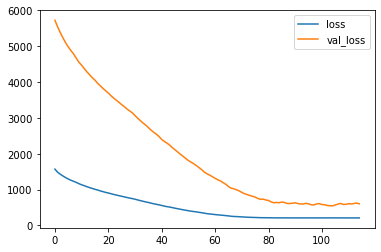

In [83]:
plt.plot(loss)
plt.plot(val_loss)

plt.legend(['loss', 'val_loss'])

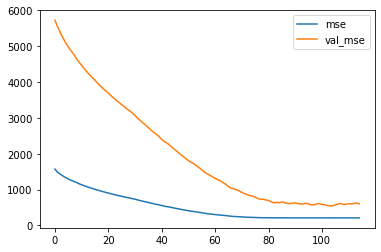

In [84]:
plt.plot(mse)
plt.plot(val_mse)

plt.legend(['mse', 'val_mse'])